In [47]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [44]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [45]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

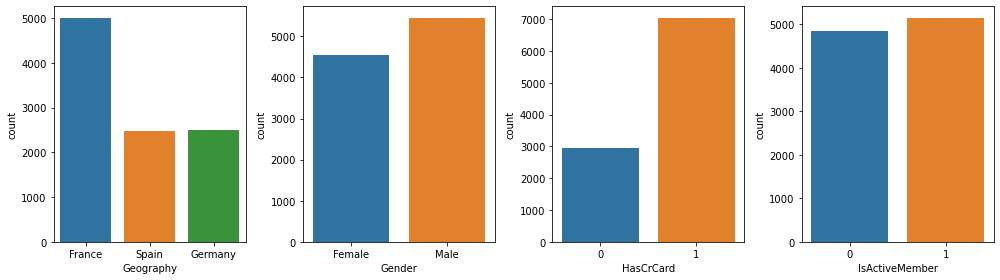

In [35]:
fig, axs = plt.subplots(1,4,figsize=(14,4))
sns.countplot(x='Geography', data=df, ax=axs[0])
sns.countplot(x='Gender', data=df, ax=axs[1])
sns.countplot(x='HasCrCard', data=df, ax=axs[2])
sns.countplot(x='IsActiveMember', data=df, ax=axs[3])
fig.tight_layout()


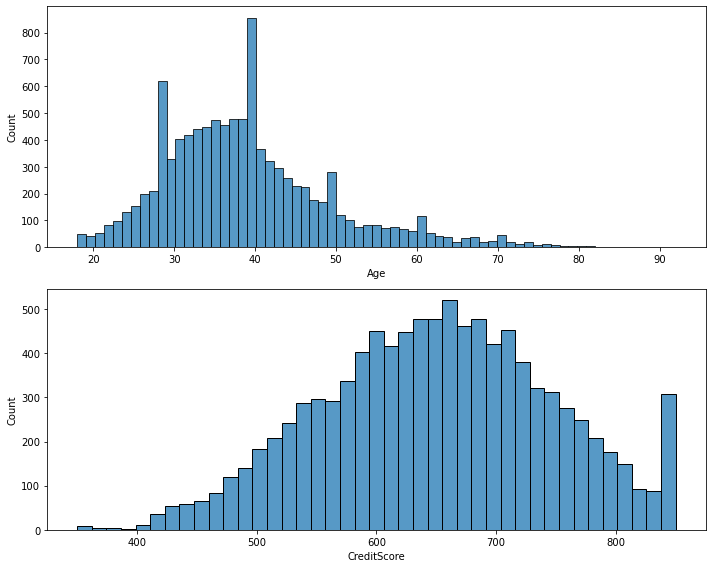

In [43]:
fig, axs = plt.subplots(2,1,figsize=(10,8))
sns.histplot(x='Age', data=df,ax=axs[0])
sns.histplot(x='CreditScore', data=df, ax=axs[1])
fig.tight_layout()


In [55]:
feature =  df.columns[3:13].values.tolist()
target = "Exited"

In [56]:
feature

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [57]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.291-b10, mixed mode)
  Starting server from D:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\iHAVECPU\AppData\Local\Temp\tmp032b25ej
  JVM stdout: C:\Users\iHAVECPU\AppData\Local\Temp\tmp032b25ej\h2o_LastOrder_started_from_python.out
  JVM stderr: C:\Users\iHAVECPU\AppData\Local\Temp\tmp032b25ej\h2o_LastOrder_started_from_python.err


D:\Anaconda3\lib\site-packages\h2o\backend\server.py:386: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_LastOrder_g45ntd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.0 Mb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [58]:
dataset = h2o.H2OFrame(df)
dataset.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:10000
Cols:14




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
type,int,int,enum,int,enum,enum,int,int,real,int,int,int,real,int
mins,1.0,15565701.0,,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
mean,5000.5,15690940.569399957,,650.5288000000023,,,38.92179999999989,5.012799999999995,76485.88928800033,1.530200000000003,0.7055,0.5151,100090.23988099981,0.2037
maxs,10000.0,15815690.0,,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0
sigma,2886.8956799071675,71936.18612274907,,96.65329873613035,,,10.48780645170459,2.8921743770496837,62397.40520238599,0.5816543579989917,0.4558404644751334,0.49979692845891893,57510.49281769821,0.40276858399486093
zeros,0,0,,0,,,0,413,3617,0,2945,4849,0,7963
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


In [60]:
col_factors = ['Gender', 'Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [61]:
for i in col_factors:
    dataset[i]= dataset[i].asfactor()

In [62]:
# split into train and validation sets
train, valid= dataset.split_frame(ratios = [.8], seed = 1234)

In [64]:
aml = H2OAutoML( max_models=20, seed=1)

In [65]:
aml.train(x=feature, y=target, training_frame=train, validation_frame = valid)

AutoML progress: |██
15:58:17.321: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
15:58:38.262: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220706_155727

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07600968012028748
RMSE: 0.27569853122620636
LogLoss: 0.2514012530707731
Null degrees of freedom: 8036
Residual degrees of freedom: 8031
Null deviance: 8047.902707612123
Residual deviance: 4041.023741859606
AIC: 4053.023741859606
AUC: 0.9370465621389948
AUCPR: 0.8285486649010161
Gini: 0.8740931242779897

Confusion Matrix (Act/

,,0,1,Error,Rate
0,0,5790.0,638.0,0.0993,(638.0/6428.0)
1,1,323.0,1286.0,0.2007,(323.0/1609.0)
2,Total,6113.0,1924.0,0.1196,(961.0/8037.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.253274,0.727993,219.0
1,max f2,0.151749,0.794677,268.0
2,max f0point5,0.575062,0.781932,119.0
3,max accuracy,0.455522,0.895235,153.0
4,max precision,0.994131,1.000000,0.0
5,max recall,0.012746,1.000000,384.0
6,max specificity,0.994131,1.000000,0.0
7,max absolute_mcc,0.253274,0.656425,219.0
8,max min_per_class_accuracy,0.197756,0.852987,245.0
9,max mean_per_class_accuracy,0.187900,0.856801,250.0



Gains/Lift Table: Avg response rate: 20.02 %, avg score: 19.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.968499,4.995028,4.995028,1.000000,0.981168,1.000000,0.981168,0.050342,0.050342,399.502797,399.502797,0.050342
1,2,0.020032,0.946813,4.995028,4.995028,1.000000,0.958060,1.000000,0.969685,0.049720,0.100062,399.502797,399.502797,0.100062
2,3,0.030111,0.926361,4.995028,4.995028,1.000000,0.935658,1.000000,0.958296,0.050342,0.150404,399.502797,399.502797,0.150404
3,4,0.040065,0.900218,4.995028,4.995028,1.000000,0.914293,1.000000,0.947364,0.049720,0.200124,399.502797,399.502797,0.200124
4,5,0.050019,0.867770,4.870152,4.970177,0.975000,0.882008,0.995025,0.934358,0.048477,0.248602,387.015227,397.017708,0.248290
5,6,0.100037,0.638404,4.261927,4.616052,0.853234,0.763199,0.924129,0.848778,0.213176,0.461778,326.192685,361.605197,0.452288
6,7,0.150056,0.441489,2.969681,4.067262,0.594527,0.531987,0.814262,0.743181,0.148539,0.610317,196.968081,306.726158,0.575469
7,8,0.200075,0.317116,2.174452,3.594059,0.435323,0.376205,0.719527,0.651437,0.108763,0.719080,117.445247,259.405930,0.648918
8,9,0.299988,0.186149,1.511571,2.900472,0.302615,0.242858,0.580672,0.515357,0.151025,0.870106,51.157135,190.047248,0.712825
9,10,0.400025,0.120044,0.714463,2.353800,0.143035,0.149474,0.471229,0.423858,0.071473,0.941579,-28.553704,135.380012,0.677111




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.10895070545230795
RMSE: 0.3300768175020899
LogLoss: 0.3548189353182876
Null degrees of freedom: 1962
Residual degrees of freedom: 1957
Null deviance: 2062.6419818654695
Residual deviance: 1393.0191400595972
AIC: 1405.0191400595972
AUC: 0.861063502694146
AUCPR: 0.7040101369460011
Gini: 0.722127005388292

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3231035299461077: 


,,0,1,Error,Rate
0,0,1407.0,128.0,0.0834,(128.0/1535.0)
1,1,167.0,261.0,0.3902,(167.0/428.0)
2,Total,1574.0,389.0,0.1503,(295.0/1963.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323104,0.638923,184.0
1,max f2,0.120820,0.707878,285.0
2,max f0point5,0.526404,0.684097,120.0
3,max accuracy,0.526404,0.853286,120.0
4,max precision,0.985954,1.000000,0.0
5,max recall,0.004323,1.000000,396.0
6,max specificity,0.985954,1.000000,0.0
7,max absolute_mcc,0.328159,0.546357,182.0
8,max min_per_class_accuracy,0.163525,0.776547,256.0
9,max mean_per_class_accuracy,0.171075,0.781279,252.0



Gains/Lift Table: Avg response rate: 21.80 %, avg score: 19.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010188,0.952558,4.586449,4.586449,1.000000,0.969890,1.000000,0.969890,0.046729,0.046729,358.644860,358.644860,0.046729
1,2,0.020377,0.919805,4.357126,4.471787,0.950000,0.933449,0.975000,0.951670,0.044393,0.091121,335.712617,347.178738,0.090470
2,3,0.030056,0.900139,4.345057,4.430976,0.947368,0.912404,0.966102,0.939025,0.042056,0.133178,334.505657,343.097576,0.131875
3,4,0.040245,0.864879,4.127804,4.354223,0.900000,0.877750,0.949367,0.923512,0.042056,0.175234,312.780374,335.422335,0.172628
4,5,0.050433,0.840861,4.127804,4.308482,0.900000,0.851270,0.939394,0.908918,0.042056,0.217290,312.780374,330.848202,0.213381
5,6,0.100357,0.603627,3.276035,3.794879,0.714286,0.719657,0.827411,0.814768,0.163551,0.380841,227.603471,279.487879,0.358691
6,7,0.150280,0.441011,2.433626,3.342666,0.530612,0.517717,0.728814,0.716087,0.121495,0.502336,143.362579,234.266593,0.450219
7,8,0.200204,0.320925,2.152823,3.045962,0.469388,0.377525,0.664122,0.631661,0.107477,0.609813,115.282281,204.596205,0.523820
8,9,0.300051,0.192113,1.263613,2.452855,0.275510,0.247140,0.534805,0.503705,0.126168,0.735981,26.361339,145.285451,0.557480
9,10,0.399898,0.134667,0.842409,2.050756,0.183673,0.160173,0.447134,0.417932,0.084112,0.820093,-15.759107,105.075600,0.537357




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.09963265543891157
RMSE: 0.31564640888011314
LogLoss: 0.3283179767321704
Null degrees of freedom: 8036
Residual degrees of freedom: 8031
Null deviance: 8048.646035291612
Residual deviance: 5277.3831579929065
AIC: 5289.3831579929065
AUC: 0.8682876500147158
AUCPR: 0.7053453394318262
Gini: 0.7365753000294315

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28461479338472745: 


,,0,1,Error,Rate
0,0,5728.0,700.0,0.1089,(700.0/6428.0)
1,1,546.0,1063.0,0.3393,(546.0/1609.0)
2,Total,6274.0,1763.0,0.155,(1246.0/8037.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.284615,0.630486,209.0
1,max f2,0.131253,0.700413,289.0
2,max f0point5,0.622519,0.693007,103.0
3,max accuracy,0.622519,0.865870,103.0
4,max precision,0.995153,1.000000,0.0
5,max recall,0.003250,1.000000,398.0
6,max specificity,0.995153,1.000000,0.0
7,max absolute_mcc,0.394711,0.540114,169.0
8,max min_per_class_accuracy,0.175645,0.781852,262.0
9,max mean_per_class_accuracy,0.212288,0.786253,242.0



Gains/Lift Table: Avg response rate: 20.02 %, avg score: 20.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.950514,4.933361,4.933361,0.987654,0.970682,0.987654,0.970682,0.049720,0.049720,393.336096,393.336096,0.049565
1,2,0.020032,0.925105,4.807714,4.870928,0.962500,0.935809,0.975155,0.953354,0.047856,0.097576,380.771442,387.092789,0.096954
2,3,0.030111,0.900642,4.625026,4.788622,0.925926,0.913207,0.958678,0.939916,0.046613,0.144189,362.502590,378.862185,0.142633
3,4,0.040065,0.870212,4.745277,4.777853,0.950000,0.886902,0.956522,0.926745,0.047234,0.191423,374.527657,377.785284,0.189245
4,5,0.050019,0.841613,4.120898,4.647116,0.825000,0.855134,0.930348,0.912494,0.041019,0.232443,312.089807,364.711557,0.228087
5,6,0.100037,0.602789,3.640655,4.143885,0.728856,0.730545,0.829602,0.821519,0.182101,0.414543,264.065471,314.388514,0.393230
6,7,0.150056,0.433904,2.311132,3.532968,0.462687,0.513285,0.707297,0.718775,0.115600,0.530143,131.113234,253.296754,0.475227
7,8,0.200075,0.319528,1.925944,3.131212,0.385572,0.372798,0.626866,0.632281,0.096333,0.626476,92.594362,213.121156,0.533134
8,9,0.299988,0.196801,1.306296,2.523411,0.261519,0.249133,0.505185,0.504671,0.130516,0.756992,30.629623,152.341106,0.571398
9,10,0.400025,0.131661,0.813866,2.095892,0.162935,0.161641,0.419596,0.418887,0.081417,0.838409,-18.613350,109.589198,0.548116




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.858412,0.016150,0.860744,0.841784,0.841749,0.875386,0.872398
1,auc,0.868773,0.008837,0.864920,0.856706,0.874906,0.879429,0.867903
2,err,0.141588,0.016150,0.139256,0.158216,0.158251,0.124614,0.127602
3,err_count,228.000000,31.376743,232.000000,259.000000,257.000000,202.000000,190.000000
4,f0point5,0.651338,0.049497,0.654904,0.592874,0.610644,0.690647,0.707620
5,f1,0.641147,0.020570,0.653731,0.610526,0.629149,0.655290,0.657040
6,f2,0.633444,0.016808,0.652563,0.629262,0.648810,0.623377,0.613208
7,lift_top_group,4.935148,0.155717,4.958334,5.180380,4.936170,4.797632,4.803226
8,logloss,0.327807,0.011726,0.330133,0.340862,0.330445,0.308677,0.328918
9,max_per_class_error,0.370465,0.032479,0.348214,0.357595,0.337386,0.396226,0.412903



See the whole table with table.as_data_frame()


In [66]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20220706_155727,0.868288,0.328318,0.705345,0.22412,0.315646,0.0996327
StackedEnsemble_AllModels_1_AutoML_1_20220706_155727,0.868003,0.327719,0.70738,0.227221,0.315238,0.0993748
GBM_grid_1_AutoML_1_20220706_155727_model_2,0.86625,0.330587,0.704291,0.228,0.316366,0.100087
GBM_grid_1_AutoML_1_20220706_155727_model_3,0.862661,0.333089,0.699914,0.239482,0.317036,0.100512
GBM_2_AutoML_1_20220706_155727,0.861736,0.335785,0.692371,0.238251,0.319426,0.102033
GBM_1_AutoML_1_20220706_155727,0.86162,0.33591,0.69185,0.241117,0.319376,0.102001
GBM_5_AutoML_1_20220706_155727,0.86138,0.334629,0.695236,0.235606,0.31825,0.101283
GBM_3_AutoML_1_20220706_155727,0.86065,0.336818,0.691619,0.233602,0.320208,0.102533
DRF_1_AutoML_1_20220706_155727,0.8561,0.39106,0.677349,0.238794,0.322592,0.104065
GBM_4_AutoML_1_20220706_155727,0.855148,0.342951,0.678425,0.243922,0.322349,0.103909


In [71]:
preds = aml.predict(valid)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [73]:
print(preds)

predict,p0,p1
0,0.942183,0.0578168
0,0.960645,0.0393554
0,0.981997,0.0180028
0,0.984467,0.0155331
1,0.354852,0.645148
0,0.979867,0.0201326
0,0.991697,0.00830349
0,0.95701,0.0429897
0,0.855753,0.144247
0,0.991267,0.00873322


In [129]:
perf = aml.leader.model_performance(valid)

In [130]:
perf.accuracy()

[[0.5264042808181882, 0.8532857870606215]]

In [80]:
model_path = h2o.save_model(model = aml.leader, path ='model/', force = True)

In [89]:
saved_model = h2o.load_model(model_path)

## Test Inference

In [115]:
test = df.head()

In [116]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
test.pop('Exited')

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [118]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [119]:
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [120]:
test

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [121]:
saved_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.650664,0.349336
0,0.942187,0.0578126
1,0.0141893,0.985811
0,0.942183,0.0578168
0,0.947321,0.052679


## Other model without Stacked Ensemble

In [123]:
gbm_model = h2o.get_model('GBM_grid_1_AutoML_1_20220706_155727_model_2')

In [131]:
perf2 = gbm_model.model_performance(valid)

In [132]:
perf2.accuracy()

[[0.4894165886595777, 0.8537952114111055]]

In [125]:
gbm_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.717072,0.282928
0,0.850217,0.149783
1,0.0636709,0.936329
0,0.951928,0.0480724
0,0.827094,0.172906


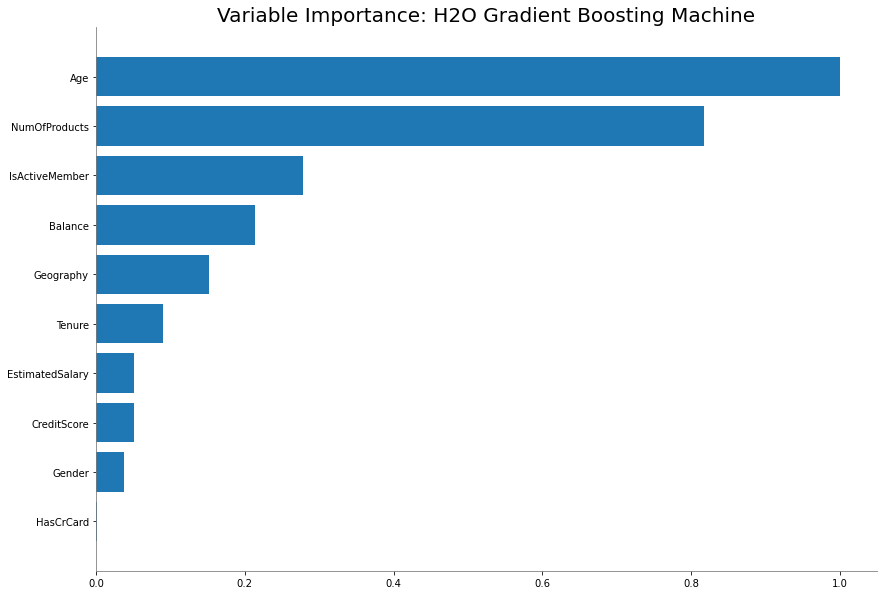

<Figure size 432x288 with 0 Axes>

In [126]:
gbm_model.varimp_plot(num_of_features = len(feature))

In [134]:
gbm_model_path = h2o.save_model(model = gbm_model, path ='model/', force = True)